In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 275s 704ms/step - loss: 0.6461 - accuracy: 0.5566 - val_loss: 0.4505 - val_accuracy: 0.7573
Epoch 2/10
391/391 [==============================] - 288s 738ms/step - loss: 0.3331 - accuracy: 0.8565 - val_loss: 0.3424 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 288s 738ms/step - loss: 0.2434 - accuracy: 0.9053 - val_loss: 0.3218 - val_accuracy: 0.8656
Epoch 4/10
391/391 [==============================] - 291s 743ms/step - loss: 0.2158 - accuracy: 0.9194 - val_loss: 0.3291 - val_accuracy: 0.8620
Epoch 5/10
391/391 [==============================] - 288s 737ms/step - loss: 0.1810 - accuracy: 0.9356 - val_loss: 0.3455 - val_accuracy: 0.8594
Epoch 6/10
391/391 [==============================] - 291s 745ms/step - loss: 0.1616 - accuracy: 0.9428 - val_loss: 0.3708 - val_accuracy: 0.8589
Epoch 7/10
391/391 [==============================] - 289s 740ms/step - loss: 0.1445 - accuracy: 0.9505 - val_loss: 0.3742 -

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 143s 367ms/step - loss: 0.4867 - accuracy: 0.8540
Test Loss: 0.48667067289352417
Test Accuracy: 0.8540400266647339


In [15]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [16]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [17]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.312462]]


In [18]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.14661136]]


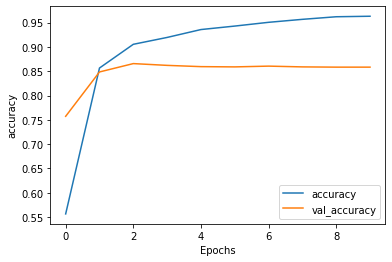

In [19]:
plot_graphs(history, 'accuracy')

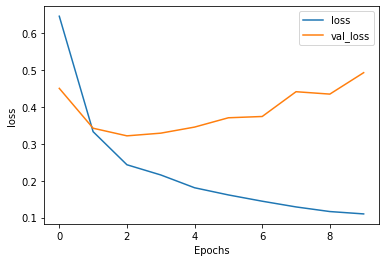

In [20]:
plot_graphs(history, 'loss')

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 1358s 3s/step - loss: 0.6850 - accuracy: 0.5114 - val_loss: 0.5816 - val_accuracy: 0.6917
Epoch 2/10
391/391 [==============================] - 1355s 3s/step - loss: 0.4141 - accuracy: 0.8184 - val_loss: 0.3966 - val_accuracy: 0.8224
Epoch 3/10
391/391 [==============================] - 1338s 3s/step - loss: 0.2825 - accuracy: 0.8964 - val_loss: 0.3395 - val_accuracy: 0.8641
Epoch 4/10
391/391 [==============================] - 1355s 3s/step - loss: 0.2222 - accuracy: 0.9223 - val_loss: 0.3620 - val_accuracy: 0.8573
Epoch 5/10
391/391 [==============================] - 814s 2s/step - loss: 0.1817 - accuracy: 0.9412 - val_loss: 0.3773 - val_accuracy: 0.8682
Epoch 6/10
391/391 [==============================] - 543s 1s/step - loss: 0.1576 - accuracy: 0.9512 - val_loss: 0.4173 - val_accuracy: 0.8604
Epoch 7/10
391/391 [==============================] - 542s 1s/step - loss: 0.1304 - accuracy: 0.9624 - val_loss: 0.4440 - val_accuracy: 0.

In [24]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 145s 372ms/step - loss: 0.5594 - accuracy: 0.8479
Test Loss: 0.5593984127044678
Test Accuracy: 0.8479200005531311


In [25]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.365146]]


In [26]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-3.65378]]


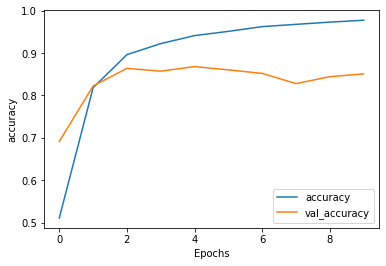

In [27]:
plot_graphs(history, 'accuracy')

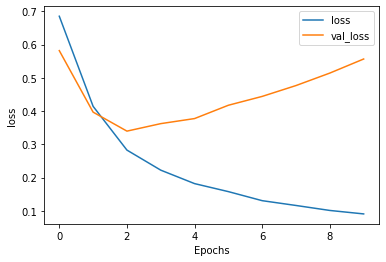

In [28]:
plot_graphs(history, 'loss')